In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import geopandas as gpd
import pandas as pd

elevation data source
* https://datacatalog.worldbank.org/search/dataset/0037910

coastal created manually in QGIS

HDI source
* https://globaldatalab.org/shdi/table/

population density data source
* https://hub.worldpop.org/geodata/summary?id=46241

age distribution (download all age 60 or higher rasters for male and female)

* https://hub.worldpop.org/geodata/listing?id=88

population total to divide age subset (to get proportion of population above X years old)

* https://hub.worldpop.org/geodata/summary?id=49919





## Elevation

In [4]:
gdf = gpd.read_file('china_city.geojson')

In [5]:
gdf['adm1'].unique()

array(['beijingshi', 'tianjinshi', 'hebeisheng', 'shanxisheng',
       'neimengguzizhiqu', 'liaoningsheng', 'jilinsheng',
       'heilongjiangsheng', 'shanghaishi', 'jiangsusheng',
       'zhejiangsheng', 'anhuisheng', 'fujiansheng', 'jiangxisheng',
       'shandongsheng', 'henansheng', 'hubeisheng', 'hunansheng',
       'guangdongsheng', 'guangxizhuangzuzizhiqu', 'hainansheng',
       'chongqingshi', 'sichuansheng', 'guizhousheng', 'yunnansheng',
       'xizangzizhiqu', 'shaanxisheng', 'gansusheng', 'qinghaisheng',
       'ningxiahuizuzizhiqu', 'xinjiangweiwuerzizhiqu', 'taiwansheng',
       'xianggangtebiexingzhengqu', 'aomentebiexingzhengqu'], dtype=object)

<Axes: >

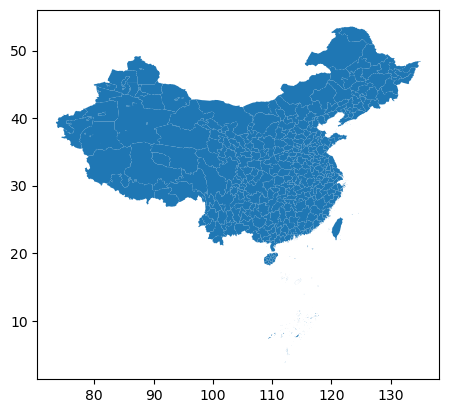

In [6]:
gdf.plot()

In [7]:
import geopandas as gpd
from rasterstats import zonal_stats

In [13]:
values = "social_physical_var_dataset/World_ELE_GISdata_GlobalSolarAtlas-v2_GEOTIFF/ELE.tif"


stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["mean"]))
gdf = gdf.join(stats)


/opt/anaconda3/lib/python3.12/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [15]:
gdf.rename(columns = {'mean':'mean_elev'}, inplace=True)

Text(0.5, 1.0, 'Average elevation (m) in China districts')

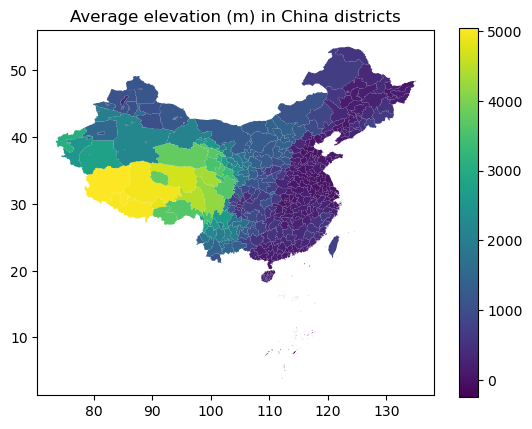

In [17]:
gdf.plot(column='mean_elev', legend=True )
plt.title("Average elevation (m) in China districts")

In [19]:
gdf['location'] = gdf['adm2'] + ', ' + gdf['adm1']

In [21]:
gdf

,province,city,adm1,adm2,geometry,mean_elev,location
0,北京市,北京市,beijingshi,beijingshi,"MULTIPOLYGON (((116.66689 40.97671, 116.68126 ...",368.903920,"beijingshi, beijingshi"
1,天津市,天津市,tianjinshi,tianjinshi,"MULTIPOLYGON (((117.46737 40.23886, 117.49701 ...",16.372675,"tianjinshi, tianjinshi"
2,河北省,石家庄市,hebeisheng,shijiazhuangshi,"MULTIPOLYGON (((113.83088 38.74802, 113.83905 ...",257.793410,"shijiazhuangshi, hebeisheng"
3,河北省,唐山市,hebeisheng,tangshanshi,"MULTIPOLYGON (((118.61425 39.00000, 118.59575 ...",62.082261,"tangshanshi, hebeisheng"
4,河北省,秦皇岛市,hebeisheng,qinhuangdaoshi,"MULTIPOLYGON (((119.14956 40.60191, 119.15490 ...",234.221630,"qinhuangdaoshi, hebeisheng"
...,...,...,...,...,...,...,...
370,新疆维吾尔自治区,新星市,xinjiangweiwuerzizhiqu,xinxingshi,"MULTIPOLYGON (((95.57302 41.99986, 95.51550 41...",1625.722497,"xinxingshi, xinjiangweiwuerzizhiqu"
371,新疆维吾尔自治区,白杨市,xinjiangweiwuerzizhiqu,baiyangshi,"MULTIPOLYGON (((82.78747 46.68111, 82.82672 46...",548.041420,"baiyangshi, xinjiangweiwuerzizhiqu"
372,台湾省,台湾省,taiwansheng,taiwansheng,"MULTIPOLYGON (((121.60056 22.02062, 121.59325 ...",771.775576,"taiwansheng, taiwansheng"
373,香港特别行政区,香港特别行政区,xianggangtebiexingzhengqu,xianggangtebiexingzhengqu,"MULTIPOLYGON (((114.27453 22.16333, 114.25354 ...",125.780292,"xianggangtebiexingzhengqu, xianggangtebiexingz..."


## Coastal

In [24]:
coast = gpd.read_file('social_physical_var_dataset/china_city_coastal.geojson')

In [26]:
coast['location'] = coast['adm2'] + ', ' + coast['adm1']

In [28]:
gdf['coast'] = [1 if x in coast['location'].unique() else 0 for x in gdf['location']]

<Axes: >

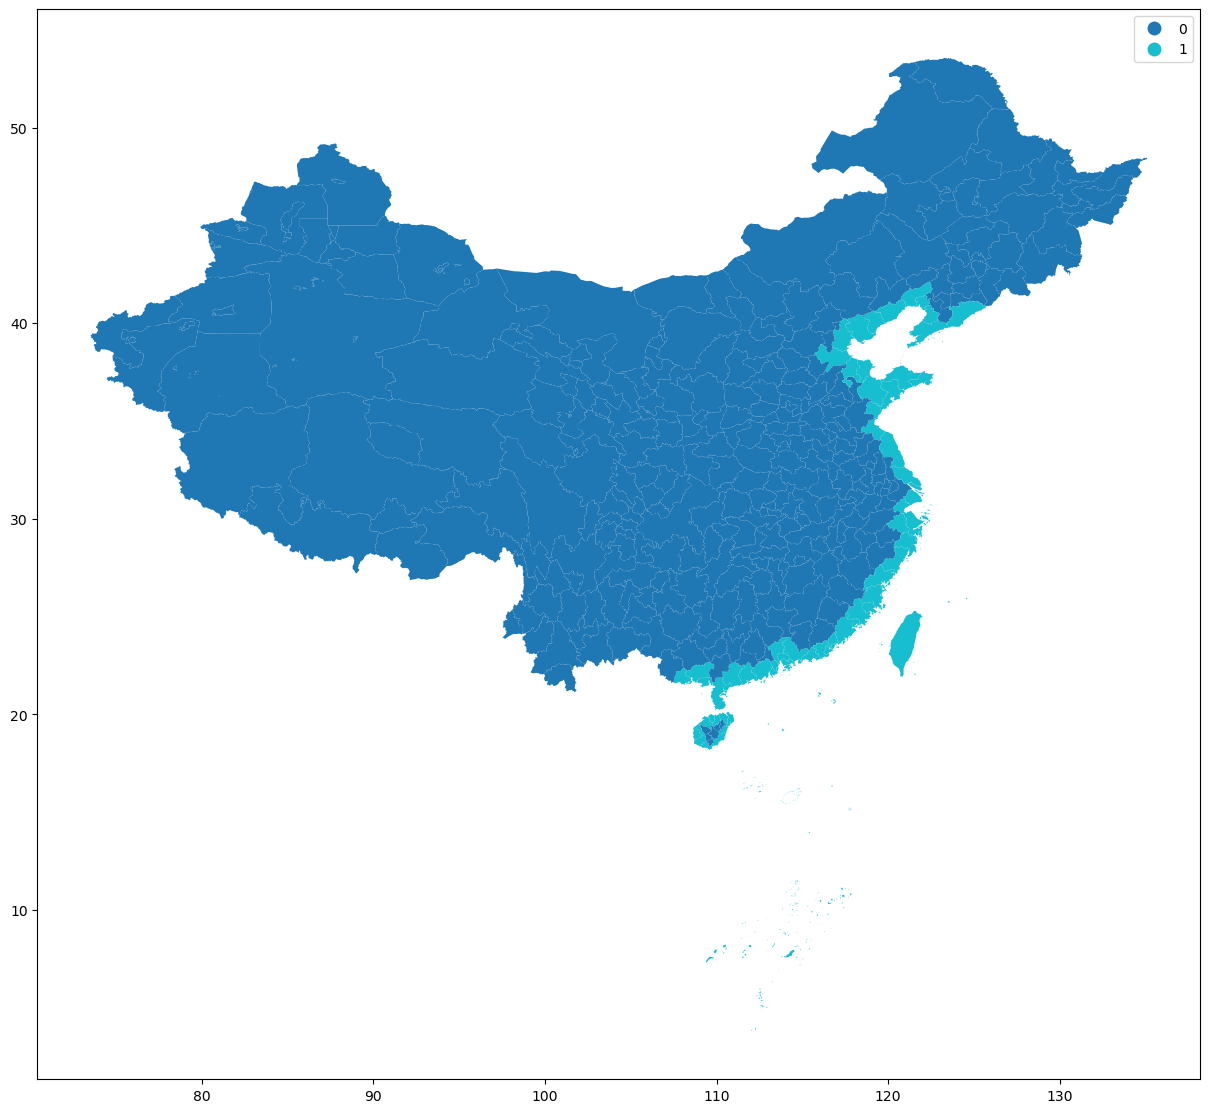

In [30]:
gdf.plot(column='coast', categorical= True, legend=True,figsize=(15,15))

## Human Development Index

In [33]:
import pandas as pd

In [35]:
hdi = pd.read_excel('social_physical_var_dataset/hdi_index.xlsx')

In [37]:
gdf = gdf.merge(hdi[['adm1', 'HDI']],on='adm1',how='left')

In [39]:
gdf.dropna(inplace=True)

Text(0.5, 1.0, 'Provincial HDI China')

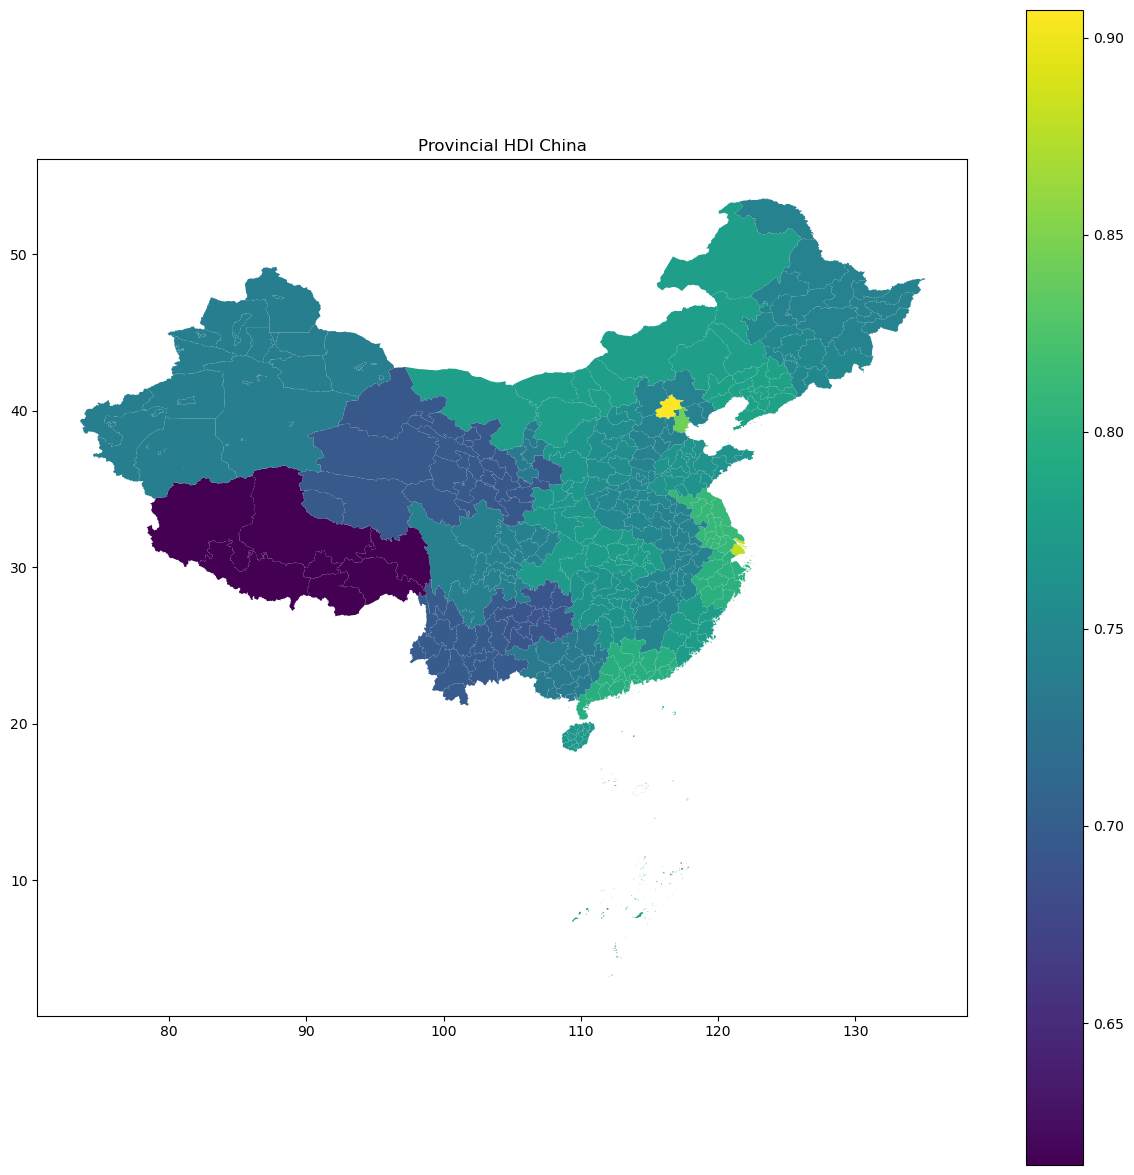

In [41]:
gdf.plot(column='HDI', legend=True,figsize=(15,15))
plt.title('Provincial HDI China')

## Population density

In [44]:
#https://hub.worldpop.org/geodata/summary?id=44834

values = "social_physical_var_dataset/chn_pop_2023_CN_1km_R2025A_UA_v1.tif"

stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
gdf = gdf.join(stats)

In [60]:
china_albers_proj = (
    '+proj=aea '      
    '+lat_1=25 '   
    '+lat_2=47 '   
    '+lat_0=35 '     
    '+lon_0=105 '   
    '+x_0=0 '       
    '+y_0=0 '        
    '+ellps=WGS84 '   
    '+units=m '      
    '+no_defs'        
)

In [62]:
gdf = gdf.to_crs(china_albers_proj)

In [66]:
gdf['area'] = gdf.geometry.area / 1e6

In [76]:
gdf['popdens'] = gdf['sum']/gdf['area']

In [80]:
gdf = gdf[['adm1', 'adm2', 'geometry', 'mean_elev', 'location', 'coast', 'HDI', 'popdens']]

In [86]:
gdf.sort_values(by='popdens')

,adm1,adm2,geometry,mean_elev,location,coast,HDI,popdens
235,hainansheng,sanshashi,"MULTIPOLYGON (((870621.009 -3327396.585, 86898...",-251.763593,"sanshashi, hainansheng",1,0.769,0.153672
305,xizangzizhiqu,alidiqu,"MULTIPOLYGON (((-1668716.826 256972.923, -1669...",5047.470560,"alidiqu, xizangzizhiqu",0,0.614,0.377227
332,gansusheng,taizishantianranlinbaohuqu,"MULTIPOLYGON (((-140734.593 32138.761, -140443...",3012.266854,"taizishantianranlinbaohuqu, gansusheng",0,0.693,0.965845
35,neimengguzizhiqu,alashanmeng,"MULTIPOLYGON (((-554481.901 883976.510, -55051...",1259.830384,"alashanmeng, neimengguzizhiqu",0,0.777,1.120575
304,xizangzizhiqu,naqushi,"MULTIPOLYGON (((-1784615.491 -269399.613, -177...",4959.906446,"naqushi, xizangzizhiqu",0,0.614,1.472329
...,...,...,...,...,...,...,...,...
198,guangdongsheng,guangzhoushi,"MULTIPOLYGON (((830308.996 -1280904.563, 82961...",105.540140,"guangzhoushi, guangdongsheng",1,0.799,2629.916158
114,fujiansheng,xiamenshi,"MULTIPOLYGON (((1334301.552 -1091692.750, 1330...",146.162017,"xiamenshi, fujiansheng",1,0.775,3277.882615
72,shanghaishi,shanghaishi,"MULTIPOLYGON (((1585189.741 -289157.474, 15895...",3.916582,"shanghaishi, shanghaishi",1,0.880,3481.900994
214,guangdongsheng,dongguanshi,"MULTIPOLYGON (((909586.757 -1287021.441, 90994...",38.902572,"dongguanshi, guangdongsheng",1,0.799,4395.196699


Text(0.5, 1.0, 'Pop Den China')

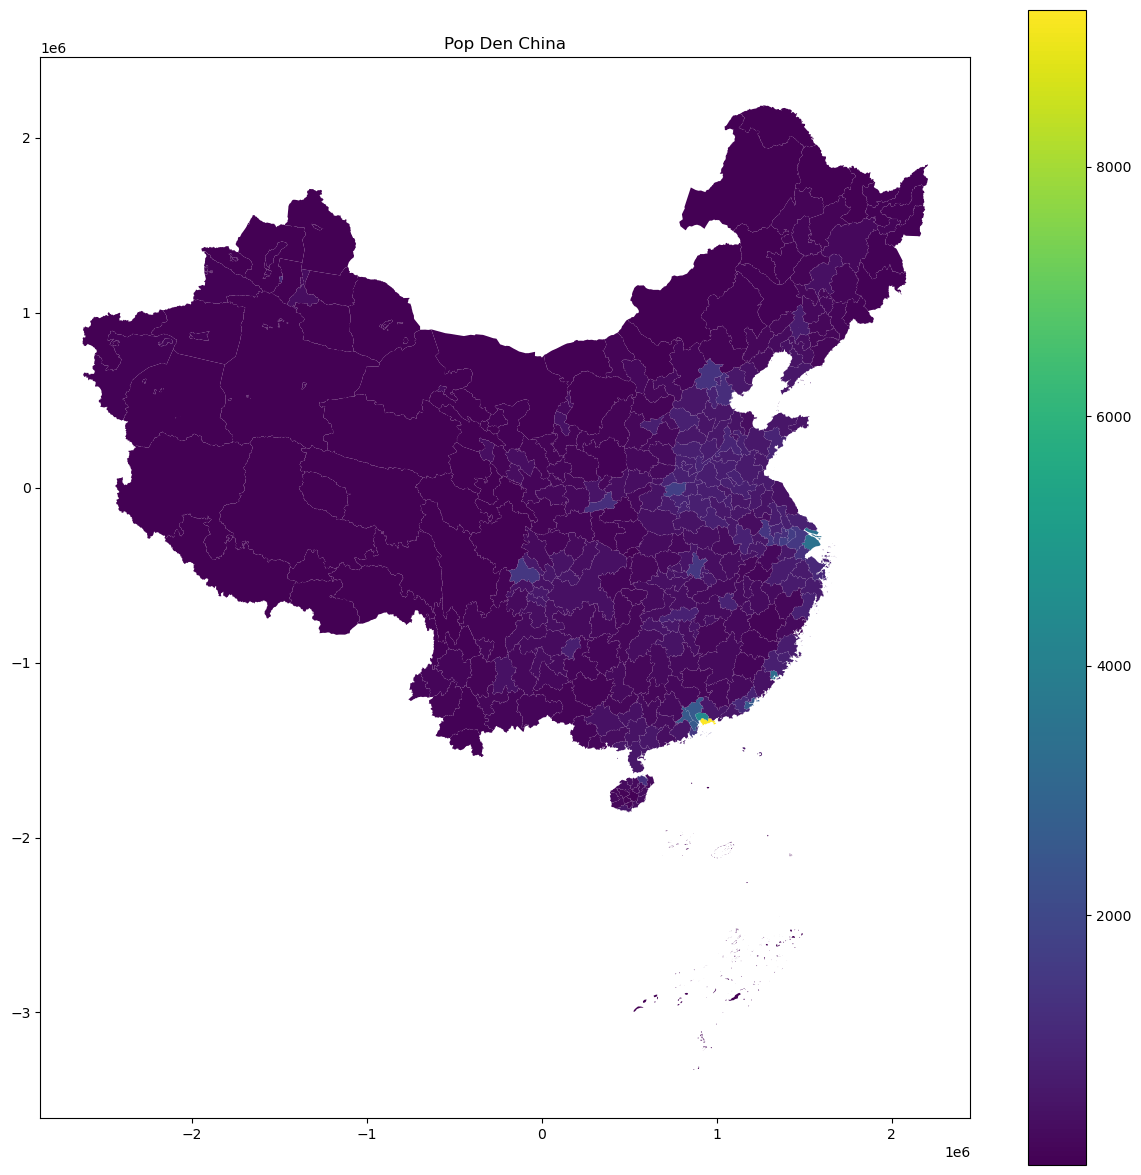

In [82]:
gdf.plot(column='popdens', legend=True,figsize=(15,15))
plt.title('Pop Den China')

In [88]:
import glob

## Age

In [93]:
#set projection back to 4326 to align with tiff
gdf.to_crs(4326, inplace=True)

/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [95]:
# sum all population totals above 60+

gdf['over60_pop'] = 0
for file in glob.glob('social_physical_var_dataset/age/*'):
    
    values = file
    
    pop_total = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['over60_pop'] += pop_total['sum']

/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [97]:
# divide 60+ age by total population to get population proportion above 60
for file in glob.glob('social_physical_var_dataset/pop/*'):
    
    values = file
    
    pop_sum = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['pop_total'] = pop_sum['sum']

/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [99]:
gdf['over60_propor'] = gdf['over60_pop'] / gdf['pop_total']

/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [129]:
gdf.iloc[100:]

,adm1,adm2,geometry,mean_elev,location,coast,HDI,popdens,over60_pop,pop_total,over60_propor,HDI_dec,popdens_dec,over60_dec
100,anhuisheng,huainanshi,"MULTIPOLYGON (((116.70027 32.93867, 116.72550 ...",28.510084,"huainanshi, anhuisheng",0,0.744,551.097348,651030.810547,3.046771e+06,0.213679,4,8,8
101,anhuisheng,maanshanshi,"MULTIPOLYGON (((118.40348 31.91509, 118.41027 ...",25.654385,"maanshanshi, anhuisheng",0,0.744,532.813398,480891.137207,2.167558e+06,0.221858,4,8,8
102,anhuisheng,huaibeishi,"MULTIPOLYGON (((116.96622 34.08160, 116.96090 ...",33.144826,"huaibeishi, anhuisheng",0,0.744,724.823848,336844.611328,1.989656e+06,0.169298,4,9,4
103,anhuisheng,tonglingshi,"MULTIPOLYGON (((117.32474 30.47733, 117.31627 ...",45.354664,"tonglingshi, anhuisheng",0,0.744,439.186961,302953.050781,1.312002e+06,0.230909,4,7,9
104,anhuisheng,anqingshi,"MULTIPOLYGON (((117.02135 31.26017, 117.02845 ...",216.927050,"anqingshi, anhuisheng",0,0.744,308.765382,921239.998047,4.178260e+06,0.220484,4,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,xinjiangweiwuerzizhiqu,kekedalashi,"MULTIPOLYGON (((80.63289 43.83355, 80.63605 43...",593.764706,"kekedalashi, xinjiangweiwuerzizhiqu",0,0.738,91.787741,13121.251038,9.140053e+04,0.143558,3,3,2
368,xinjiangweiwuerzizhiqu,kunyushi,"MULTIPOLYGON (((81.27278 36.14278, 81.27250 36...",1340.992886,"kunyushi, xinjiangweiwuerzizhiqu",0,0.738,93.888245,5033.410091,6.335668e+04,0.079446,3,3,1
369,xinjiangweiwuerzizhiqu,huyangheshi,"MULTIPOLYGON (((85.00773 44.75433, 85.04377 44...",317.560886,"huyangheshi, xinjiangweiwuerzizhiqu",0,0.738,32.028017,3018.684818,2.117754e+04,0.142542,3,2,2
370,xinjiangweiwuerzizhiqu,xinxingshi,"MULTIPOLYGON (((95.57302 41.99986, 95.51550 41...",1625.722497,"xinxingshi, xinjiangweiwuerzizhiqu",0,0.738,12.011006,4499.697525,2.920961e+04,0.154049,3,1,3


Text(0.5, 1.0, 'Age 60+ population proportion')

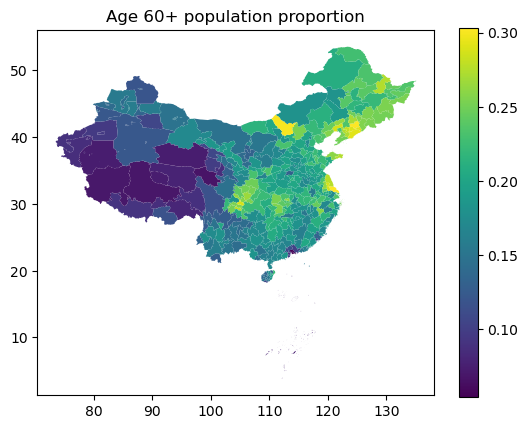

In [103]:
gdf.plot(column='over60_propor', legend=True)
plt.title("Age 60+ population proportion")

In [107]:
gdf

,adm1,adm2,geometry,mean_elev,location,coast,HDI,popdens,over60_pop,pop_total,over60_propor
0,beijingshi,beijingshi,"MULTIPOLYGON (((116.66689 40.97671, 116.68126 ...",368.903920,"beijingshi, beijingshi",0,0.907,1350.873376,4.396288e+06,2.218326e+07,0.198180
1,tianjinshi,tianjinshi,"MULTIPOLYGON (((117.46737 40.23886, 117.49701 ...",16.372675,"tianjinshi, tianjinshi",1,0.844,1175.614093,3.067275e+06,1.403984e+07,0.218469
2,hebeisheng,shijiazhuangshi,"MULTIPOLYGON (((113.83088 38.74802, 113.83905 ...",257.793410,"shijiazhuangshi, hebeisheng",0,0.744,807.529617,2.130880e+06,1.135304e+07,0.187693
3,hebeisheng,tangshanshi,"MULTIPOLYGON (((118.61425 39.00000, 118.59575 ...",62.082261,"tangshanshi, hebeisheng",1,0.744,558.620698,1.777061e+06,7.696288e+06,0.230898
4,hebeisheng,qinhuangdaoshi,"MULTIPOLYGON (((119.14956 40.60191, 119.15490 ...",234.221630,"qinhuangdaoshi, hebeisheng",1,0.744,402.310571,7.374093e+05,3.126664e+06,0.235845
...,...,...,...,...,...,...,...,...,...,...,...
367,xinjiangweiwuerzizhiqu,kekedalashi,"MULTIPOLYGON (((80.63289 43.83355, 80.63605 43...",593.764706,"kekedalashi, xinjiangweiwuerzizhiqu",0,0.738,91.787741,1.312125e+04,9.140053e+04,0.143558
368,xinjiangweiwuerzizhiqu,kunyushi,"MULTIPOLYGON (((81.27278 36.14278, 81.27250 36...",1340.992886,"kunyushi, xinjiangweiwuerzizhiqu",0,0.738,93.888245,5.033410e+03,6.335668e+04,0.079446
369,xinjiangweiwuerzizhiqu,huyangheshi,"MULTIPOLYGON (((85.00773 44.75433, 85.04377 44...",317.560886,"huyangheshi, xinjiangweiwuerzizhiqu",0,0.738,32.028017,3.018685e+03,2.117754e+04,0.142542
370,xinjiangweiwuerzizhiqu,xinxingshi,"MULTIPOLYGON (((95.57302 41.99986, 95.51550 41...",1625.722497,"xinxingshi, xinjiangweiwuerzizhiqu",0,0.738,12.011006,4.499698e+03,2.920961e+04,0.154049


In [109]:
HDI_subset = gdf.drop_duplicates('HDI')

In [111]:
deciles = pd.qcut(HDI_subset['HDI'], 10, labels= range(1,11)).astype(int)
HDI_subset['HDI_dec'] = deciles
gdf = gdf.merge(HDI_subset[['HDI', 'HDI_dec']], on='HDI')


gdf['popdens_dec'] = pd.qcut(gdf['popdens'], 10, labels= range(1,11)).astype(int)
gdf['over60_dec'] = pd.qcut(gdf['over60_propor'], 10, labels= range(1,11)).astype(int)

/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [119]:
gdf_old = pd.read_csv('social_and_physical_variables_old.csv')

In [125]:
np.corrcoef(gdf['popdens_dec'],gdf_old['popdens_dec'])

array([[1.        , 0.50598125],
       [0.50598125, 1.        ]])

In [127]:
np.corrcoef(gdf['over60_dec'],gdf_old['over60_dec'])

array([[1.        , 0.42418364],
       [0.42418364, 1.        ]])

In [133]:
gdf.drop(columns='geometry').to_csv('social_and_physical_variables.csv')